# **1. Data Profiling**


**Load the Dataset**


In [1]:
import pandas as pd
reviews = pd.read_csv("/content/tiktok_reviews.csv")

In [2]:
reviews.head()

,Rating,Review,Timestamp
0,5,Love it,2024-11-16 13:09:37
1,5,Md Sagor,2024-11-16 13:08:05
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19
3,1,عامين باش يتعمر,2024-11-16 13:05:08
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47


In [3]:
reviews.shape

(5000, 3)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rating     5000 non-null   int64 
 1   Review     5000 non-null   object
 2   Timestamp  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


**Summary Statistics**

 **detecting  Duplicate Records**




In [5]:
#detecting & removing the duplicates articles :
print('# Duplicate : ',reviews.duplicated().sum())

#If there are duplicate use:
#reviews.drop_duplicates(inplace=True)



# Duplicate :  0


**checking Missing Values**

In [6]:
#checking if there is nan values :
print('# NANS:',reviews.isna().sum())
reviews.dropna(inplace=True)
reviews.reset_index(drop=True,inplace=True)

# NANS: Rating       0
Review       0
Timestamp    0
dtype: int64


**Split the textual data into words.**

In [7]:
text_column = 'Review'

reviews['split_words'] = reviews[text_column].dropna().apply(lambda x: str(x).split())
print("\nSample of split words:\n", reviews[['split_words']].head())


# Counting the words in each article:
reviews["word_count"] = reviews["Review"].apply(lambda x: len(x.split(" ")))



Sample of split words:
                                          split_words
0                                         [Love, it]
1                                        [Md, Sagor]
2  [Dear,, TikTok, team, my, big, problem, my, ac...
3                                [عامين, باش, يتعمر]
4  [My, activity, and, notifications, tabs, won't...


In [8]:
print(reviews["word_count"].describe())


count    5000.000000
mean       10.515000
std        15.786602
min         1.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       124.000000
Name: word_count, dtype: float64


In [9]:
reviews.head(10)

,Rating,Review,Timestamp,split_words,word_count
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13
5,4,Nice,2024-11-16 13:03:51,[Nice],1
6,1,Tiktok valo mare live ni one,2024-11-16 13:03:18,"[Tiktok, valo, mare, live, ni, one]",6
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6
8,5,"As a 1st timer, nakaka excite kahit maliit mas...",2024-11-16 12:57:33,"[As, a, 1st, timer,, nakaka, excite, kahit, ma...",15
9,5,I like it,2024-11-16 12:57:14,"[I, like, it]",3


**Text Analysis**

**Print the 10 most frequent words in all textual content.**


In [10]:
all_words = [word for sublist in reviews['split_words'].dropna() for word in sublist]


In [11]:
from collections import Counter

# Word frequency
word_counts = Counter(all_words)
print("\nTop 10 most common words:\n", word_counts.most_common(10))





Top 10 most common words:
 [('my', 1256), ('I', 1250), ('and', 1096), ('the', 937), ('account', 926), ('please', 893), ('to', 883), ('app', 879), ('it', 704), ('is', 678)]


In [12]:
reviews.head(10)

,Rating,Review,Timestamp,split_words,word_count
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13
5,4,Nice,2024-11-16 13:03:51,[Nice],1
6,1,Tiktok valo mare live ni one,2024-11-16 13:03:18,"[Tiktok, valo, mare, live, ni, one]",6
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6
8,5,"As a 1st timer, nakaka excite kahit maliit mas...",2024-11-16 12:57:33,"[As, a, 1st, timer,, nakaka, excite, kahit, ma...",15
9,5,I like it,2024-11-16 12:57:14,"[I, like, it]",3


**Visualize the textual content using two methods (Word cloud,bar chart)**

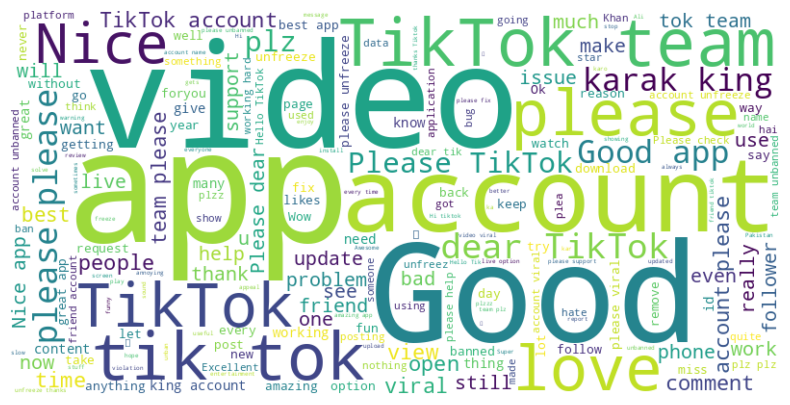

In [13]:
 # Word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Join the list of words into a single string
all_words_str = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=None).generate(all_words_str)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

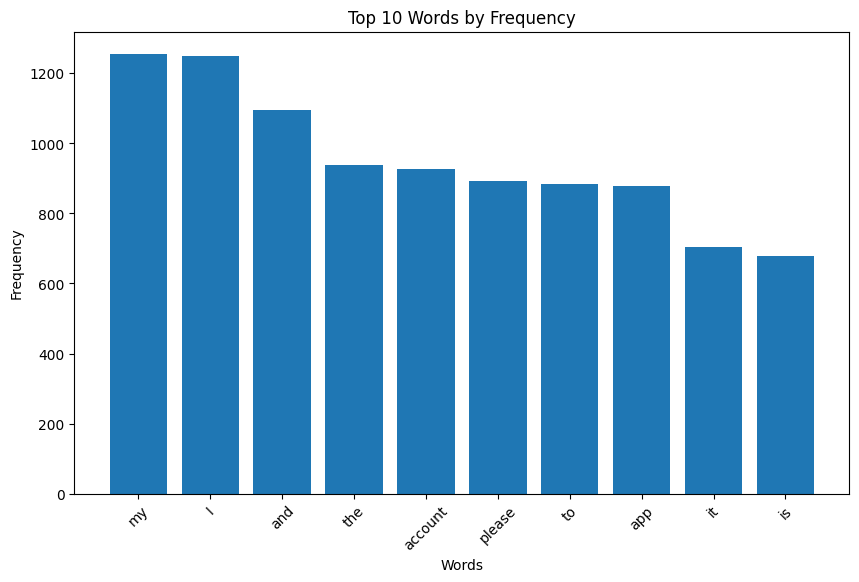

In [14]:
#Bar chart for the most 10 freqent words
# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

 # Prepare data for plotting
words, counts = zip(*top_10_words)

    # Plot the frequencie
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


**Show the distribution according to the class (Rating)**

In [15]:
reviews['Rating'].unique()

array([5, 2, 1, 4, 3])

In [16]:
df = reviews.copy()

In [17]:
df["Rating"].unique()

array([5, 2, 1, 4, 3])

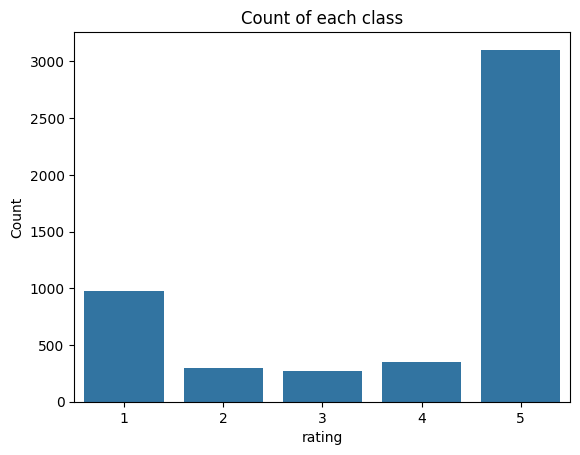

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame and 'class' is the column we want to plot
sns.countplot(data=df, x='Rating')
plt.title('Count of each class')
plt.xlabel('rating')
plt.ylabel('Count')

plt.show()

In [19]:
df["Rating"].value_counts()

,count
Rating,
5,3103
1,980
4,350
2,298
3,269


**Examining a sample of the data to identify potential issues and understand its structure.**







In [ ]:
df.loc[1056,'Review']

'Rajkumar Rajkumar'

In [ ]:
df.loc[3993,'Review']

'پو'

In [ ]:
df.loc[957,'Review']

'♥️Pirashanth ♥️Thaventhini ♥️peniksha ♥️🥰🧚\u200d♂️🧚🥰'

In [ ]:
df.loc[4040,'Review']

'SLIEEMJAN'

In [ ]:
df.loc[3761,'Review']

'Plzzzz TikTok team unfreeze my TikTok account plzzz plzzz🙏🙏🙏🙏🙏🙏🙏plzzz@rizwanbhai2008 unfreeze my account thank you'

In [ ]:
df.loc[1014,'Review']

'Lee-,Juane Swarts Luck . ....... ......'

In [ ]:
df.loc[4910,'Review']

'হুম'

**Print the total number of stopwords and the 10 most frequent
stopwords in the text**

In [20]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

word_list = all_words

# Filter stopwords
stopword_list = [word for word in word_list if word.lower() in stop_words]

# Total number of stopwords
total_stopwords = len(stopword_list)
print(f"Total number of stopwords: {total_stopwords}")

# Most frequent stopwords
stopword_counts = Counter(stopword_list)
top_10_stopwords = stopword_counts.most_common(10)
print("\nTop 10 most frequent stopwords:")
for word, count in top_10_stopwords:
        print(f"{word}: {count}")



Total number of stopwords: 18794

Top 10 most frequent stopwords:
my: 1256
I: 1250
and: 1096
the: 937
to: 883
it: 704
is: 678
you: 630
a: 571
for: 455


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Check and identify the spelling mistakes in the text.**

In [ ]:

from textblob import TextBlob
import nltk

# Download the required NLTK data
!python -m textblob.download_corpora lite
nltk.download('punkt_tab')
nltk.download('punkt')

text_column = 'Review'

# Function to identify misspelled words
def find_spelling_mistakes(text):
    words = all_words  # Split text into words
    misspelled = []
    for word in words:
        blob = TextBlob(word) # Create a TextBlob object for each word
        if word not in str(blob.correct()):  # Check if the word is misspelled
            misspelled.append(word)
    return misspelled
misspelled_words = find_spelling_mistakes(all_words)
unique_mistakes = set(misspelled_words)
print("Unique spelling mistakes found:", unique_mistakes)
print(f"Total number of spelling mistakes: {len(misspelled_words)}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Finished.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unique spelling mistakes found: {'foji', 'manny', 'p*rn', 'uranus', 'nazi', 'biasness.', 'accessable', 'addicting', 'Aacharya', 'If', 'Geared', '@dimand.soul62', 'Hai', 'Closes', 'কক্', 'haha', 'AT', 'Somrat', 'Nice', 'osman', 'dms', 'daysy', 'ofc', 'Many', 'automaticcly', 'kg', 'Xxx', 'profiles!!', 'mogłem', 'requeste', 'Anik', 'Laggy', 'Costco', 'Liars,', 'rzan', 'alikom', 'downlaoad', 'yar', 'supperb', 'Username..yousaf.muna.9T9', 'ainda', 'ecnat', 'etyy', 'amar', 'pr', 'eits', 'Raja', 'nember', 'paj', 'likha', 'Sk🥰Sime🥰', 'yah', 'recomended.few', 'fariz', 'Tim', 'fake', 'juke', 'unbanned', 'unfreeze', 'banding', 'Lolu', 'hates', 'aata', 'kolwa', 'varil.', 'haunting', 'glitchy', 'Naseem', 'guidlines', 'Nac', '1m.like', 'foller', '😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭plz', 'York', 'Un', 'sewar', 'saba.', 'achi', 'Iike', 'asap', 'ghe', 'veiws', 'yirl', 'Can', 'updates', 'Tem', 'accunt', 'encrypted.', 'alekum', 'fui', 'dekhte', 'bas', 'virlation...', 'Opin', 'Awan', 'pops', 'caveat?', 'Mardan',

# **2.Data Cleaning**


**Remove all stopwords, punctuation, and URLs**:

**Why did I decide to keep emojis and not remove them?**


**The question arises: is it necessary to remove emojis from the data? After researching, the decision depends on the context of the analysis and how emojis affect the specific use case. Emojis can provide valuable insights, especially for sentiment or emotion analysis, but may introduce noise in tasks like topic modeling or text classification. In this project, I focused on cleaning the data without making decisions about emojis, leaving that choice to the end user based on their analysis goals.**

In [21]:
import re
import string


# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Clean the 'Review' column
text_column = 'Review'
if text_column in reviews.columns:
    reviews['cleaned_review'] = reviews[text_column].dropna().apply(clean_text)
    print("\nSample of cleaned reviews:\n", reviews[['cleaned_review']].head())
else:
    print(f"Column '{text_column}' not found in the dataset.")



Sample of cleaned reviews:
                                       cleaned_review
0                                               Love
1                                           Md Sagor
2  Dear TikTok team big problem account freez plz...
3                                    عامين باش يتعمر
4  activity notifications tabs wont load endless ...


**Convert all words to small letters.**

In [22]:
text_column = 'cleaned_review'  # The column to update

if text_column in reviews.columns:
    # Convert all text in the 'cleaned_review' column to lowercase
    reviews[text_column] = reviews[text_column].dropna().apply(lambda x: str(x).lower())
    print("\nSample of updated lowercase reviews:\n", reviews[[text_column]].head())
else:
    print(f"Column '{text_column}' not found in the dataset.")



Sample of updated lowercase reviews:
                                       cleaned_review
0                                               love
1                                           md sagor
2  dear tiktok team big problem account freez plz...
3                                    عامين باش يتعمر
4  activity notifications tabs wont load endless ...


In [23]:
reviews.head(10)

,Rating,Review,Timestamp,split_words,word_count,cleaned_review
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2,love
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2,md sagor
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30,dear tiktok team big problem account freez plz...
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3,عامين باش يتعمر
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13,activity notifications tabs wont load endless ...
5,4,Nice,2024-11-16 13:03:51,[Nice],1,nice
6,1,Tiktok valo mare live ni one,2024-11-16 13:03:18,"[Tiktok, valo, mare, live, ni, one]",6,tiktok valo mare live ni one
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6,account please 🙏🥺
8,5,"As a 1st timer, nakaka excite kahit maliit mas...",2024-11-16 12:57:33,"[As, a, 1st, timer,, nakaka, excite, kahit, ma...",15,1st timer nakaka excite kahit maliit masabi mo...
9,5,I like it,2024-11-16 12:57:14,"[I, like, it]",3,like


**Print the 10 most frequent words in all textual content.**

In [24]:
if text_column in reviews.columns:
    reviews['cleaned_review'] = reviews[text_column].dropna().apply(clean_text)# Flatten all words into a single list
    all_words = ' '.join(reviews['cleaned_review'].dropna()).split()

    # Count word frequencies
    word_counts = Counter(all_words)

    # Get the 10 most frequent words
    most_frequent_words = word_counts.most_common(10)
    print("\nTop 10 most frequent words:")
    for word, count in most_frequent_words:
        print(f"{word}: {count}")
else:
    print(f"Column '{text_column}' not found in the dataset.")


Top 10 most frequent words:
please: 1359
tiktok: 1241
app: 1051
account: 1017
good: 712
team: 467
tik: 354
video: 353
tok: 343
love: 299


**To detect rows with empty strings in addition to NaN values**

In [25]:
#checking if there is nan values :
print('# NANS:',reviews.isna().sum())
reviews.dropna(inplace=True)
reviews.reset_index(drop=True,inplace=True)

# NANS: Rating            0
Review            0
Timestamp         0
split_words       0
word_count        0
cleaned_review    0
dtype: int64


In [26]:
empty_count = reviews.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum().sum()
print(f'Rows with empty strings or whitespace: {empty_count}')


Rows with empty strings or whitespace: 23


<ipython-input-26-7b99e774ce41>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_count = reviews.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum().sum()


**drop rows with empty strings (" ") or rows that contain only whitespace**

In [27]:
# Replace empty strings ("") with NaN
reviews.replace('', float('NaN'), inplace=True)

# Replace rows with only whitespace (e.g., "   ") with NaN
reviews = reviews.applymap(lambda x: float('NaN') if isinstance(x, str) and x.strip() == '' else x)

# Drop rows with NaN (including replaced empty strings or whitespace)
reviews.dropna(inplace=True)

# Reset index after dropping rows
reviews.reset_index(drop=True, inplace=True)

reviews.shape

<ipython-input-27-5d7a9a17bd1d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reviews = reviews.applymap(lambda x: float('NaN') if isinstance(x, str) and x.strip() == '' else x)


(4977, 6)

**Print the count of unique words in the text**

In [28]:
# Flatten all words in the 'lowercase_review' column into a single list
if 'cleaned_review' in reviews.columns:
    # Split all reviews into words and flatten them into a single list
    all_words = ' '.join(reviews['cleaned_review'].dropna()).split()

    # Count unique words
    unique_words = set(all_words)  # Use a set to remove duplicates
    unique_word_count = len(unique_words)

    # Print the count of unique words
    print(f"Count of unique words in 'cleaned_review': {unique_word_count}")


Count of unique words in 'cleaned_review': 7635


**Detecting the languages in the data and calculating the percentage of each.**

Detecting the languages in my data is crucial to understanding its distribution and ensuring effective model performance. Multilingual datasets can introduce complexity, especially if secondary languages are underrepresented. Using mBERT (Multilingual BERT) is a viable option as it handles multiple languages, but it requires careful data balancing.

Alternatively, translating all data into a single language, like English, simplifies the training process, ensures consistency, and allows for the use of monolingual models. Choosing between mBERT and translation depends on the dataset’s needs and the model’s goals.






In [29]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296183 sha256=571cb94888930658fb16aefbfc36ff9108f65e85f5ad82b863ae5316804fb0c2
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [30]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2024-12-27 06:40:20--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.167.112.129, 3.167.112.53, 3.167.112.66, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.167.112.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M   125MB/s    in 1.0s    

2024-12-27 06:40:21 (125 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [34]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=15a8fdbeecf2a23e151740b970ab08f1770a29a4c225d6e4f04cbc5b442ad5fd
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

**Language Detection and Distribution Analysis Using fastText**

In [31]:
import fasttext

# Load the pre-trained fastText language detection model
model = fasttext.load_model('lid.176.bin')

# Function to detect language using fastText
def detect_language_with_fasttext(text):
    prediction = model.predict(text)  # Predict the language
    lang = prediction[0][0].replace('__label__', '')  # Extract language code
    return lang

# Apply fastText language detection
if 'cleaned_review' in reviews.columns:
    reviews['detected_language'] = reviews['cleaned_review'].dropna().apply(detect_language_with_fasttext)

    # Calculate language counts
    language_counts = reviews['detected_language'].value_counts()

    # Calculate language percentages
    language_percentages = (language_counts / len(reviews)) * 100

    # Display the results
    print("\nLanguage Counts:\n", language_counts)
    print("\nLanguage Percentages:\n", language_percentages)
else:
    print("Column 'cleaned_review' not found in the dataset.")



Language Counts:
 detected_language
en     4052
de       90
bn       71
es       61
lt       61
       ... 
ilo       1
hi        1
gv        1
gl        1
rm        1
Name: count, Length: 82, dtype: int64

Language Percentages:
 detected_language
en     81.414507
de      1.808318
bn      1.426562
es      1.225638
lt      1.225638
         ...    
ilo     0.020092
hi      0.020092
gv      0.020092
gl      0.020092
rm      0.020092
Name: count, Length: 82, dtype: float64


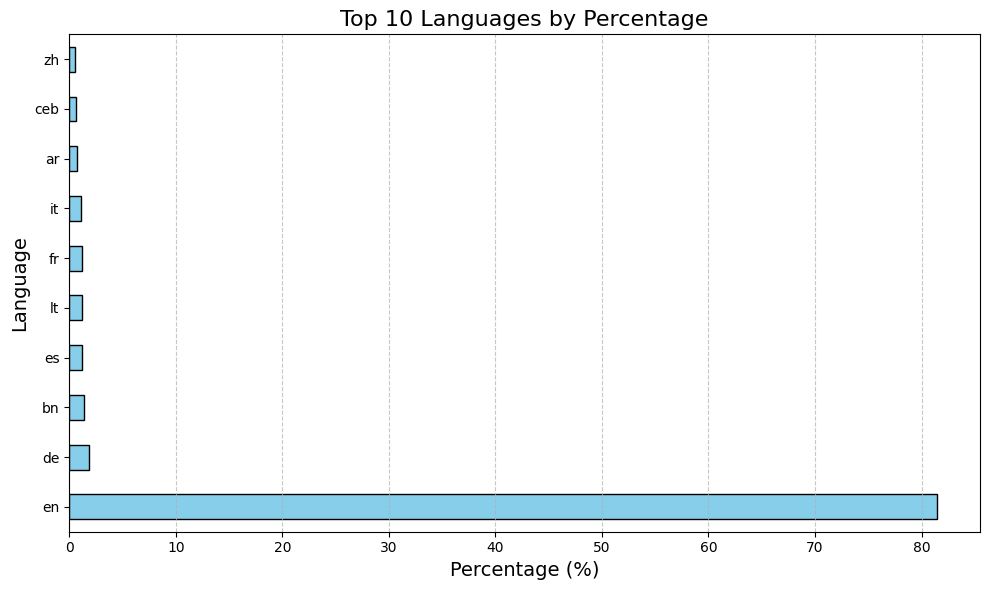

In [32]:
# Display top 10 languages by percentage
top_n = 10
top_languages = language_percentages.head(top_n)

# Plot the top N languages
plt.figure(figsize=(10, 6))
top_languages.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)
plt.title(f'Top {top_n} Languages by Percentage', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Language', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Filtering Reviews by Language Based on Percentage Threshold Using fastText**








In [33]:
import fasttext

# Load the pre-trained fastText language detection model
model = fasttext.load_model('lid.176.bin')

# Function to detect language using fastText
def detect_language_with_fasttext(text):
    prediction = model.predict(text)  # Predict the language
    lang = prediction[0][0].replace('__label__', '')  # Extract language code
    return lang

# Check if the required column exists
if 'cleaned_review' in reviews.columns:
    # Step 1: Detect languages
    reviews['detected_language'] = reviews['cleaned_review'].dropna().apply(detect_language_with_fasttext)

    # Step 2: Calculate language counts and percentages
    language_counts = reviews['detected_language'].value_counts()
    language_percentages = (language_counts / len(reviews)) * 100

    # Step 3: Set threshold for filtering rare languages
    threshold = 0.6  # Languages with < 0.6% will be filtered out
    valid_languages = language_percentages[language_percentages >= threshold].index

    # Step 4: Filter DataFrame to keep only valid languages
    reviews = reviews[reviews['detected_language'].isin(valid_languages)]

    # Display the remaining language percentages
    print("\nRemaining Language Percentages (>= 0.6%):")
    print(language_percentages[language_percentages >= threshold])
else:
    print("Column 'cleaned_review' not found in the dataset.")



Remaining Language Percentages (>= 0.6%):
detected_language
en     81.414507
de      1.808318
bn      1.426562
es      1.225638
lt      1.225638
fr      1.165361
it      1.125176
ar      0.683142
ceb     0.602773
Name: count, dtype: float64


**We retained approximately 91% of the data.**


In [35]:
reviews.shape

(4513, 7)

**Translating Stage :**

In [36]:
valid_language_codes = {
    'tl': 'fil',  # Tagalog to Filipino
    'et': 'et',   # Estonian
    'pl': 'pl',   # Polish
    'ar': 'ar',   # Arabic
    'zh-cn': 'zh',  # Simplified Chinese
    'zh-tw': 'zh',  # Traditional Chinese
    'pt-br': 'pt',  # Brazilian Portuguese
    'pt-pt': 'pt',  # European Portuguese
    # Add more mappings as needed
}
import fasttext
from googletrans import Translator

# Load the pre-trained fastText language detection model
model = fasttext.load_model('lid.176.bin')

# Initialize the Google Translator
translator = Translator()

# Step 1: Detect languages using fastText
def detect_language_with_fasttext(text):
    prediction = model.predict(text)  # Predict the language
    lang = prediction[0][0].replace('__label__', '')  # Extract language code
    return lang

# Step 2: Map unsupported or invalid language codes
valid_language_codes = {
    'tl': 'fil',  # Tagalog to Filipino
    'zh-cn': 'zh',  # Simplified Chinese
    'zh-tw': 'zh',  # Traditional Chinese
    # Add other mappings as needed
}

def map_language_code(lang):
    return valid_language_codes.get(lang, lang)  # Return the mapped code or the original code

# Step 3: Translate text to English
def translate_to_english(text, lang):
    try:
        # Map the language code to a valid one
        lang = map_language_code(lang)
        if lang != 'en':  # Only translate non-English text
            translated = translator.translate(text, src=lang, dest='en')
            return translated.text
        return text  # If already English, return the original text
    except Exception as e:
        print(f"Error translating: {e}")
        return text  # Return original text if translation fails

    # Translate non-English reviews
    reviews['translated_review'] = reviews.apply(
        lambda row: translate_to_english(row['cleaned_review'], row['detected_language']), axis=1
    )

    # Display sample translated reviews
    print("\nSample Translated Reviews:\n", reviews[['cleaned_review', 'detected_language', 'translated_review']].head())



Sample Translated Reviews:
                                       cleaned_review detected_language  \
0                                               love                es   
1                                           md sagor                de   
2  dear tiktok team big problem account freez plz...                en   
3                                    عامين باش يتعمر                ar   
4  activity notifications tabs wont load endless ...                en   

                                   translated_review  
0                                               Love  
1                                           Md sagor  
2  dear tiktok team big problem account freez plz...  
3                         Two years, Bash, builds up  
4  activity notifications tabs wont load endless ...  


In [50]:
reviews.shape

(4513, 8)

In [51]:
# Check if the required columns exist
if 'cleaned_review' in reviews.columns and 'translated_review' in reviews.columns:
    # Identify reviews that were not translated
    not_translated = reviews['cleaned_review'] == reviews['translated_review']

    # Calculate the percentage of non-translated reviews
    not_translated_count = not_translated.sum()
    total_reviews = len(reviews)
    not_translated_percentage = (not_translated_count / total_reviews) * 100

    print(f"Number of non-translated reviews: {not_translated_count}")
    print(f"Percentage of non-translated reviews: {not_translated_percentage:.2f}%")
else:
    print("Required columns ('cleaned_review', 'translated_review') not found in the dataset.")

Number of non-translated reviews: 4252
Percentage of non-translated reviews: 94.22%


In [44]:
    # Check if the review was translated
    translated_rows = reviews['cleaned_review'] != reviews['translated_review']

    # Count the number of translated rows
    num_translated = translated_rows.sum()

    # Calculate the percentage of translated rows
    total_rows = len(reviews)
    percent_translated = (num_translated / total_rows) * 100

    # Display the results
    print(f"Number of translated rows: {num_translated}")
    print(f"Percentage of translated rows: {percent_translated:.2f}%")


Number of translated rows: 261
Percentage of translated rows: 5.78%


Approximately 50% of non-English reviews remain untranslated, likely due to language detection errors, unsupported languages, or API limitations. To address this, consider cross-validating detected languages with additional tools, expanding language mappings to include more uncommon languages, and retrying failed translations using fallback APIs like Google Cloud or DeepL. Preprocessing the text (e.g., removing malformed characters or mixed-language text) can also enhance translation accuracy. Prioritize frequent non-English languages for maximum impact and document recurring issues for continuous improvement. These steps can significantly increase translation coverage and data quality.

In [52]:
reviews.head(10)

,Rating,Review,Timestamp,split_words,word_count,cleaned_review,detected_language,translated_review
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2,love,es,love
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2,md sagor,de,md sagor
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30,dear tiktok team big problem account freez plz...,en,dear tiktok team big problem account freez plz...
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3,عامين باش يتعمر,ar,"two years, bash, builds up"
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13,activity notifications tabs wont load endless ...,en,activity notifications tabs wont load endless ...
5,4,Nice,2024-11-16 13:03:51,[Nice],1,nice,en,nice
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6,account please 🙏🥺,en,account please 🙏🥺
8,5,"As a 1st timer, nakaka excite kahit maliit mas...",2024-11-16 12:57:33,"[As, a, 1st, timer,, nakaka, excite, kahit, ma...",15,1st timer nakaka excite kahit maliit masabi mo...,en,1st timer nakaka excite kahit maliit masabi mo...
9,5,I like it,2024-11-16 12:57:14,"[I, like, it]",3,like,en,like
10,5,Vlo lagce but foryou te jai na🥲🥺,2024-11-16 12:56:58,"[Vlo, lagce, but, foryou, te, jai, na🥲🥺]",7,vlo lagce foryou te jai na🥲🥺,es,vlo lagce foryou te jai na🥲🥺


In [53]:
reviews['translated_review'] = reviews['translated_review'].dropna().str.lower()


In [54]:
reviews.head(7)

,Rating,Review,Timestamp,split_words,word_count,cleaned_review,detected_language,translated_review
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2,love,es,love
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2,md sagor,de,md sagor
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30,dear tiktok team big problem account freez plz...,en,dear tiktok team big problem account freez plz...
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3,عامين باش يتعمر,ar,"two years, bash, builds up"
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13,activity notifications tabs wont load endless ...,en,activity notifications tabs wont load endless ...
5,4,Nice,2024-11-16 13:03:51,[Nice],1,nice,en,nice
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6,account please 🙏🥺,en,account please 🙏🥺


In [55]:
reviews.shape

(4513, 8)

**Replace all typos with the correct word**

In [57]:
from textblob import TextBlob

# List of protected words that should not be corrected
protected_words = {'tiktok', 'app', 'google', 'whatsapp'}

# Function to correct typos while skipping protected words
def correct_typos(text):
    corrected_words = []
    for word in text.split():  # Split the text into words
        if word.lower() in protected_words:  # Check if the word is in the protected list
            corrected_words.append(word)  # Keep the original word
        else:
            corrected_words.append(str(TextBlob(word).correct()))  # Correct the word if not protected
    return ' '.join(corrected_words)  # Join the corrected words back into a sentence

# Apply typo correction to the 'translated_review' column
text_column = 'translated_review'
if text_column in reviews.columns:
    reviews[text_column] = reviews[text_column].dropna().apply(correct_typos)
    print("\nSample of corrected reviews:\n", reviews[[text_column]].head())




Sample of corrected reviews:
                                    translated_review
0                                               love
1                                           md savor
2  dear tiktok team big problem account free ply ...
3                          two years, base, build up
4  activity modifications tabes wont load endless...


**Apply a lemmatization technique**

In [58]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
from nltk.tag import pos_tag
# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng') #This line needs to be added to download 'averaged_perceptron_tagger_eng' package

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map POS tags to WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function to perform lemmatization with POS tagging
def lemmatize_with_pos(text):
    words = text.split()  # Split text into words
    pos_tags = pos_tag(words)  # Get POS tags for each word
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)  # Join lemmatized words back into a single string

# Apply POS-aware lemmatization to the 'translated_review' column
if 'translated_review' in reviews.columns:
    reviews['lemmatized_review'] = reviews['translated_review'].dropna().apply(lemmatize_with_pos)
    print("\nSample of lemmatized reviews with POS tagging:\n", reviews[['translated_review', 'lemmatized_review']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.



Sample of lemmatized reviews with POS tagging:
                                    translated_review  \
0                                               love   
1                                           md savor   
2  dear tiktok team big problem account free ply ...   
3                          two years, base, build up   
4  activity modifications tabes wont load endless...   

                                   lemmatized_review  
0                                               love  
1                                           md savor  
2  dear tiktok team big problem account free ply ...  
3                          two years, base, build up  
4  activity modification tabes wont load endless ...  


In [59]:
reviews.head(10)

,Rating,Review,Timestamp,split_words,word_count,cleaned_review,detected_language,translated_review,lemmatized_review
0,5,Love it,2024-11-16 13:09:37,"[Love, it]",2,love,es,love,love
1,5,Md Sagor,2024-11-16 13:08:05,"[Md, Sagor]",2,md sagor,de,md savor,md savor
2,2,"Dear, TikTok team my big problem my account is...",2024-11-16 13:07:19,"[Dear,, TikTok, team, my, big, problem, my, ac...",30,dear tiktok team big problem account freez plz...,en,dear tiktok team big problem account free ply ...,dear tiktok team big problem account free ply ...
3,1,عامين باش يتعمر,2024-11-16 13:05:08,"[عامين, باش, يتعمر]",3,عامين باش يتعمر,ar,"two years, base, build up","two years, base, build up"
4,2,"My activity and notifications tabs won't load,...",2024-11-16 13:04:47,"[My, activity, and, notifications, tabs, won't...",13,activity notifications tabs wont load endless ...,en,activity modifications tabes wont load endless...,activity modification tabes wont load endless ...
5,4,Nice,2024-11-16 13:03:51,[Nice],1,nice,en,nice,nice
7,5,My account for you please 🙏🥺,2024-11-16 12:58:01,"[My, account, for, you, please, 🙏🥺]",6,account please 🙏🥺,en,account please 🙏🥺,account please 🙏🥺
8,5,"As a 1st timer, nakaka excite kahit maliit mas...",2024-11-16 12:57:33,"[As, a, 1st, timer,, nakaka, excite, kahit, ma...",15,1st timer nakaka excite kahit maliit masabi mo...,en,st time makarka excite wait mallet masabi long...,st time makarka excite wait mallet masabi long...
9,5,I like it,2024-11-16 12:57:14,"[I, like, it]",3,like,en,like,like
10,5,Vlo lagce but foryou te jai na🥲🥺,2024-11-16 12:56:58,"[Vlo, lagce, but, foryou, te, jai, na🥲🥺]",7,vlo lagce foryou te jai na🥲🥺,es,vol lace forgot te jaw na🥲🥺,vol lace forget te jaw na🥲🥺


**Print the count of unique words in the text.**


In [60]:
if 'lemmatized_review' in reviews.columns:
    # Combine all lemmatized reviews into one single string
    all_words = ' '.join(reviews['lemmatized_review'].dropna()).split()

    # Convert to a set to get unique words
    unique_words = set(all_words)

    # Print the count of unique words
    print(f"Count of unique words in the lemmatized text: {len(unique_words)}")
else:
    print("Column 'lemmatized_review' not found in the dataset.")


Count of unique words in the lemmatized text: 4823


**Save Processed Data to CSV**

In [61]:
# Check if the required columns exist
required_columns = ['lemmatized_review', 'Rating', 'Timestamp']
if all(column in reviews.columns for column in required_columns):
    # Create a new DataFrame with selected columns
    processed_data = reviews[['lemmatized_review', 'Rating', 'Timestamp']].rename(
        columns={'lemmatized_review': 'text'}
    )

    # Save to CSV
    processed_data.to_csv('processed_reviews.csv', index=False)
    print("Processed data saved successfully to 'processed_reviews.csv'.")
else:
    print("One or more required columns ('lemmatized_review', 'Rating', 'Timestamp') are missing.")


Processed data saved successfully to 'processed_reviews.csv'.
